![alt text](https://storage.googleapis.com/ifmg/ia/fuzzy/IFMG.png)

---
# Inteligência Artificial - Fuzzy

### Professor: Felipe Reis

---

### Referências

Olá,

Para solucionar esta lista de exercícios, será necessário que assista as aulas assíncronas e consulte o material da disciplina, disponibilizados no Google Classroom.

A lista inclui questões teóricas e questões práticas, sendo necessário conhecimento básico da linguagem Python.

Caso tenha dúvidas sobre a escrita de marcadores usando o Jupyter Notebook / Google Colab, consulte os links abaixo:
* https://jupyter.org/documentation
* https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook

Caso tenha dúvidas sobre programação em Python, utilização de Anaconda, Jupyter Notebook e/ou Google Colab utilize as playlists/vídeos abaixo:
* https://www.youtube.com/playlist?list=PLyqOvdQmGdTSEPnO0DKgHlkXb8x3cyglD
* https://www.youtube.com/watch?v=Gojqw9BQ5qY

---
### Instruções

Nesta seção serão utilizados os seguintes pacotes Python:

* [numpy](https://numpy.org/)
* [matplotlib](https://matplotlib.org/)
* [scikit-fuzzy](https://github.com/scikit-fuzzy/scikit-fuzzy).

A documentação dos pacotes podem ser encontradas no seguintes links:

* https://numpy.org/doc/stable/
* https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html
* https://pythonhosted.org/scikit-fuzzy/

Para instalar o pacote via PIP, execute o seguinte comando no terminal.

``` 
pip install numpy
pip install matplotlib
pip install -U scikit-fuzzy
```

Para instalar o pacote via Anaconda, execute o seguinte comando no terminal.

``` 
conda install -c anaconda numpy 
conda install -c conda-forge matplotlib 
conda install -c conda-forge scikit-fuzzy 
```

Caso esteja utilizando o Google Colab, execute a linha abaixo.

In [1]:
# Execute essa linha para instalação no Google Colab
# Os pacotes numpy e matplotlib não precisam ser instalados
# Caso esteja usando seu computador pessoal, instale o pacote via linha de comando.

!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages (0.4.2)


A linha a seguir importa as bibliotecas necessárias à execução do código.

In [2]:
# importando bibliotecas necessárias para a execução do código
import sys
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

No código a seguir, será gerada uma função de pertinência trapezoidal e utilizado 3 diferentes métodos de defuzzificação.

Analise o código abaixo e em seguida proceda as alterações solicitadas.

In [3]:
#código adapatado a partir de documentação do scikit-fuzzy

#função para plotagem de gráfico
def imprime_grafico(xvals, ymax, labels, colors):
    plt.figure(figsize=(8, 5))

    # Plota a gráfico e adiciona os valores
    plt.plot(x, mfx, 'k')
    for xv, y, label, color in zip(xvals, ymax, labels, colors):
        plt.vlines(xv, 0, y, label=label, color=color)
    plt.ylabel('Funcao de pertinencia Fuzzy')
    plt.xlabel('Universo das variaveis')
    plt.ylim(-0.1, 1.1)
    plt.legend(loc=2)

    # Exibe o gráfico
    plt.show()

---
### Sistema de Controle

Esta seção irá reproduzir o exercício resolvido existente no material de aula, usando a biblioteca fuzzy disponível para Python.

Para mais informações, consulte a documentação da biblioteca.

O link abaixo contém um exercício semelhante ao demonstrado nesta seção.

* https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

In [4]:
# função para acumulação de consequentes
# por padrão, a API acumula utilizando a função MAX, 
# o que altera o resultado mostrado nos slides (disponível no livro do Coppin)
def acc(*args):
    return np.sum(args)

In [5]:
# Definição de antecedentes e consequentes
press_pedal = ctrl.Antecedent(np.arange(0, 100, .1), 'press_pedal')
vel_carro = ctrl.Antecedent(np.arange(0, 100, .1), 'vel_carro')
vel_roda = ctrl.Antecedent(np.arange(0, 100, .1), 'vel_roda')
press_freio = ctrl.Consequent(np.arange(0, 100, .1), 'press_freio', defuzzify_method = 'centroid')

press_freio.accumulation_method = acc

In [6]:
# Definição de funções de pertinência

/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


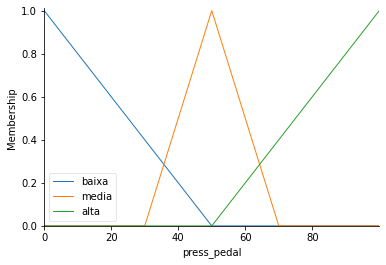

In [7]:
# pressão no pedal
press_pedal['baixa'] = fuzz.trimf(press_pedal.universe, [0, 0, 50])
press_pedal['media'] = fuzz.trimf(press_pedal.universe, [30, 50, 70])
press_pedal['alta'] = fuzz.trimf(press_pedal.universe, [50, 100, 100])

press_pedal.view()

/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


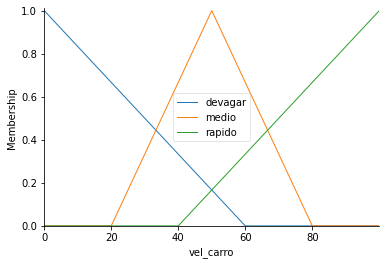

In [8]:
# velocidade do carro
vel_carro['devagar'] = fuzz.trimf(vel_carro.universe, [0, 0, 60])
vel_carro['medio'] = fuzz.trimf(vel_carro.universe, [20, 50, 80])
vel_carro['rapido'] = fuzz.trimf(vel_carro.universe, [40, 100, 100])

vel_carro.view()

/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


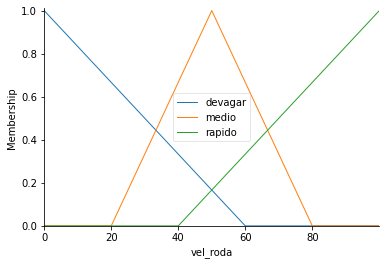

In [9]:
# velocidade da roda
vel_roda['devagar'] = fuzz.trimf(vel_roda.universe, [0, 0, 60])
vel_roda['medio'] = fuzz.trimf(vel_roda.universe, [20, 50, 80])
vel_roda['rapido'] = fuzz.trimf(vel_roda.universe, [40, 100, 100])

vel_roda.view()

/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


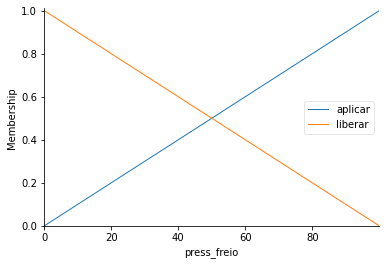

In [10]:
# pressão no freio
press_freio['aplicar'] = fuzz.trimf(press_freio.universe, [0, 100, 100])
press_freio['liberar'] = fuzz.trimf(press_freio.universe, [0, 0, 100])

press_freio.view()

In [11]:
#definição das regras
r1 = ctrl.Rule(press_pedal['media'], press_freio['aplicar'])
r2 = ctrl.Rule(press_pedal['alta'] & vel_carro['rapido'] & vel_roda['rapido'], press_freio['aplicar'])
r3 = ctrl.Rule(press_pedal['alta'] & vel_carro['rapido'] & vel_roda['devagar'], press_freio['liberar'])
r4 = ctrl.Rule(press_pedal['baixa'], press_freio['liberar'])

In [12]:
#define controlador do sistema
freio_ctrl = ctrl.ControlSystem([r1, r2, r3, r4])

In [13]:
#define o simulador de freio
freio_simul = ctrl.ControlSystemSimulation(freio_ctrl)

In [14]:
# entrada do sistema (nítida)
# pressão no pedal de freio: 60
# velocidade do carro: 80
# velocidade da roda: 55

freio_simul.input['press_pedal'] = 60.
freio_simul.input['vel_carro'] = 80.
freio_simul.input['vel_roda'] = 55.

# calcula os valores
freio_simul.compute()

/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


63.83744100354609


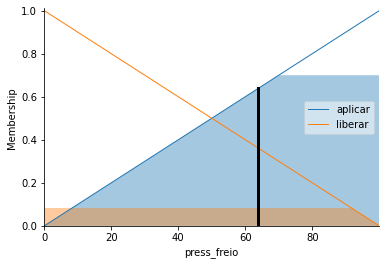

In [15]:
# imprime os resultados finais
print(freio_simul.output['press_freio'])
press_freio.view(sim=freio_simul)

In [23]:
#freio_simul.print_state()

 Antecedents 


TypeError: unsupported format string passed to Antecedent.__format__

### Sumário do Modelo

O sumário abaixo exibe informações sobre o modelo criado.

Este sumário está disponível somente em Python 2, utilizando o comando abaixo:

```
freio_simul.print_state()
```

![Sumario](https://storage.googleapis.com/ifmg/ia/fuzzy/model_info.png)

---
### Sistema de controle (continuação)

A fim de organizar melhor o código e possibilitar o desenvolvimento de outras funcionalidades, o sistema de controle anterior foi agrupado na função abaixo.

Promova as alterações pedidas nos próximos exercícios e responda às questões.

In [24]:
def sist_freio(in_met_defuzz = 'centroid', in_pressao_pedal = 0, 
               in_vel_carro = 0, in_vel_roda = 0, in_print_state = False):
    
    # Definição de antecedentes e consequentes
    press_pedal = ctrl.Antecedent(np.arange(0, 100, 0.1), 'press_pedal')
    vel_carro = ctrl.Antecedent(np.arange(0, 100, 0.1), 'vel_carro')
    vel_roda = ctrl.Antecedent(np.arange(0, 100, 0.1), 'vel_roda')
    press_freio = ctrl.Consequent(np.arange(0, 100, 0.1), 'press_freio', defuzzify_method = in_met_defuzz)

    press_freio.accumulation_method = acc
    
    # pressão no pedal
    press_pedal['baixa'] = fuzz.trimf(press_pedal.universe, [0, 0, 50])
    press_pedal['media'] = fuzz.trimf(press_pedal.universe, [30, 50, 70])
    press_pedal['alta'] = fuzz.trimf(press_pedal.universe, [50, 100, 100])

    #velocidade do carro
    vel_carro['devagar'] = fuzz.trimf(vel_carro.universe, [0, 0, 60])
    vel_carro['medio'] = fuzz.trimf(vel_carro.universe, [20, 50, 80])
    vel_carro['rapido'] = fuzz.trimf(vel_carro.universe, [40, 100, 100])
    
    # velocidade da roda
    vel_roda['devagar'] = fuzz.trimf(vel_roda.universe, [0, 0, 60])
    vel_roda['medio'] = fuzz.trimf(vel_roda.universe, [20, 50, 80])
    vel_roda['rapido'] = fuzz.trimf(vel_roda.universe, [40, 100, 100])
    
    # pressão no freio
    press_freio['aplicar'] = fuzz.trimf(press_freio.universe, [0, 100, 100])
    press_freio['liberar'] = fuzz.trimf(press_freio.universe, [0, 0, 100])
    
    #definição das regras
    r1 = ctrl.Rule(press_pedal['media'], press_freio['aplicar'])
    r2 = ctrl.Rule(press_pedal['alta'] & vel_carro['rapido'] & vel_roda['rapido'], press_freio['aplicar'])
    r3 = ctrl.Rule(press_pedal['alta'] & vel_carro['rapido'] & vel_roda['devagar'], press_freio['liberar'])
    r4 = ctrl.Rule(press_pedal['baixa'], press_freio['liberar'])
    
    #define controlador do sistema
    freio_ctrl = ctrl.ControlSystem([r1, r2, r3, r4])
    
    #define o simulador de freio
    freio_simul = ctrl.ControlSystemSimulation(freio_ctrl)
    
    freio_simul.input['press_pedal'] = in_pressao_pedal
    freio_simul.input['vel_carro'] = in_vel_carro
    freio_simul.input['vel_roda'] = in_vel_roda
    
    freio_simul.compute()
    
    if(in_print_state):
        if(sys.version_info[0] == 2):
            freio_simul.print_state()
        else:
            print('Versão do Python não compatível para impressão de sumário.')
    
    print(freio_simul.output['press_freio'])
    press_freio.view(sim=freio_simul)

Altere os parâmetros da função e verifique o comportamento do sistema.

63.83744100354609


/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


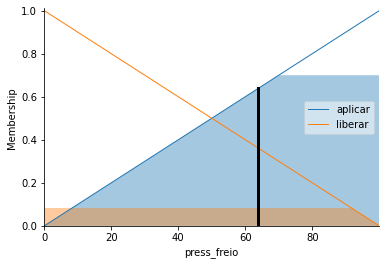

In [25]:
sist_freio(in_met_defuzz = 'centroid', in_pressao_pedal = 60., in_vel_carro = 80., in_vel_roda = 55.)

Altere o método de defuzzificação para ***'mom'*** (Média dos Máximos) e e verifique o comportamento do sistema.

84.97231450719822


/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


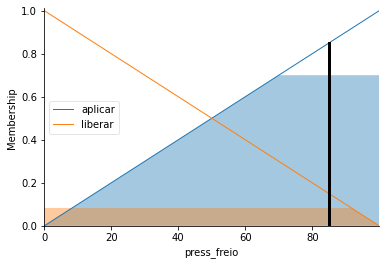

In [26]:
sist_freio(in_met_defuzz = 'mom', in_pressao_pedal = 60., in_vel_carro = 80., in_vel_roda = 55.)

Verifique outros métodos de defuzzificação no link abaixo:

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#defuzz

99.9


/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


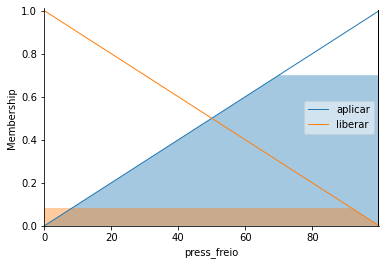

In [27]:
sist_freio(in_met_defuzz = 'lom', in_pressao_pedal = 60., in_vel_carro = 80., in_vel_roda = 55.)

70.0


/home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


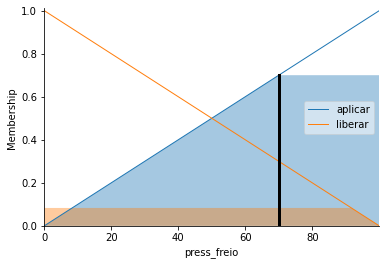

In [28]:
sist_freio(in_met_defuzz = 'som', in_pressao_pedal = 60., in_vel_carro = 80., in_vel_roda = 55.)

Verifique outras funções de pertinência no link abaixo:

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html

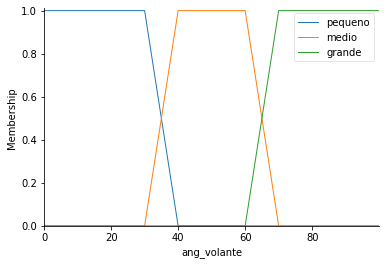

In [22]:
ang_volante = ctrl.Antecedent(np.arange(0, 100, .1), 'ang_volante')

ang_volante['pequeno'] = fuzz.trapmf(ang_volante.universe, [0, 0, 30, 40])
ang_volante['medio'] = fuzz.trapmf(ang_volante.universe, [30, 40, 60, 70])
ang_volante['grande'] = fuzz.trapmf(ang_volante.universe, [60, 70, 100, 100])

ang_volante.view()